In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

plt.rc('axes.spines', top=False, right=False)
plt.rc('figure', figsize=(9, 6))

# 1
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
 - What is the probability that no cars drive up in the noon hour?
 - What is the probability that 3 or more cars come through the drive through?
 - How likely is it that the drive through gets at least 1 car?

Text(0, 0.5, '$P(X = x)$')

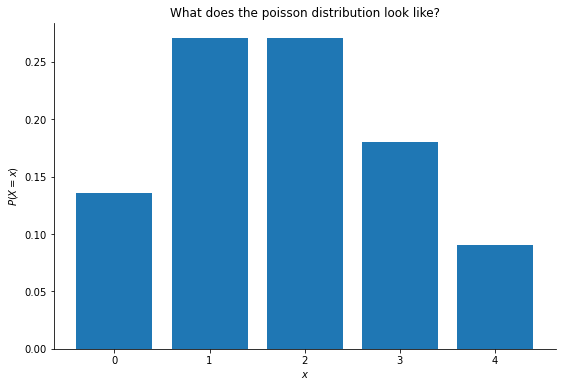

In [2]:
# Chart the distribution

x = np.arange(0, 5)
y = stats.poisson(2).pmf(x)

plt.bar(x, y)
plt.title('What does the poisson distribution look like?')
plt.xlabel('$x$')
plt.ylabel('$P(X = x)$')

In [3]:
#What is the probability that no cars drive up in the noon hour? - (Distribution)

average_rate = 2
stats.poisson(average_rate).pmf(0)


0.1353352832366127

In [73]:
#What is the probability that no cars drive up in the noon hour? - (Simulation)

size = 100_000
cars = np.random.poisson(2, size = size)
pd.Series(cars)
df = pd.DataFrame(cars)
df["cars"] = df.sum(axis=1) == 0
df.cars.mean()

0.13753

In [5]:
#What is the probability that 3 or more cars come through the drive through? - (Distribution)
## Need to use 2, because greater than is not inclusive

average_rate = 2
stats.poisson(average_rate).sf(2)


0.32332358381693654

In [74]:
#What is the probability that 3 or more cars come through the drive through? - (Simulation)

size = 100_000
cars = np.random.poisson(2, size = size)
pd.Series(cars)
df = pd.DataFrame(cars)
df["cars"] = df.sum(axis=1) >= 3
df.cars.mean()

0.32111

In [7]:
#How likely is it that the drive through gets at least 1 car? - (Distribution)

average_rate = 2
stats.poisson(average_rate).sf(0)


0.8646647167633873

In [75]:
#How likely is it that the drive through gets at least 1 car? - (Simulation)

size = 100_000
cars = np.random.poisson(2, size = size)
pd.Series(cars)
df = pd.DataFrame(cars)
df["cars"] = df.sum(axis=1) >= 1
df.cars.mean()

0.86429

# 2
Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their 
  class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify 
  for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [9]:
#What grade point average is required to be in the top 5% of the graduating class? - (Distribution)

mean = 3.0 
sd = 0.3 

round(stats.norm(mean, sd).isf(.05),2)

3.49

In [10]:
#What grade point average is required to be in the top 5% of the graduating class? - (Simulation)

gpa_top_5 = np.random.normal(3.0, 0.3, size= 100_000)
round(pd.Series(gpa_top_5).quantile(.95),2)

3.49

In [11]:
# What GPA constitutes the bottom 15% of the class? - (Distribution)

mean = 3.0 
sd = 0.3 

round(stats.norm(mean, sd).ppf(.15),2)

2.69

In [12]:
# What GPA constitutes the bottom 15% of the class? - (Simulation)

gpa = np.random.normal(3.0, 0.3, size= 100_000)
round(pd.Series(gpa).quantile(.15),2)

2.69

In [13]:
#An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
#Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship? - (Distribution)

mean = 3.0 
sd = 0.3 

"""
1st 0-1, 2nd 1-2, 3rd 2-3 (20%)
"""
#bottom of 3rd decile
bottom = round(stats.norm(mean, sd).ppf(.2),2)

#top of 3rd decile
top = round(stats.norm(mean, sd).ppf(.3),2)

print(f"The lower bound is:{bottom}")
print(f"The upper bound is:{top}")

The lower bound is:2.75
The upper bound is:2.84


In [14]:
#An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
#Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship? - (Simulations)

print("The lower bound is:",round(stats.norm(3.0,.3).ppf(.2),2))
print("The upper bound is:",round(stats.norm(3.0,.3).ppf(.3),2))

The lower bound is: 2.75
The upper bound is: 2.84


In [15]:
#Would a student with a 2.8 grade point average qualify for this scholarship? - (Distribution / Simulation)


print(f'The range of the third decile is {bottom} to {top}')
print('This means a studnt with a 2.8 gpa would qualify')

The range of the third decile is 2.75 to 2.84
This means a studnt with a 2.8 gpa would qualify


In [16]:
#If I have a GPA of 3.5, what percentile am I in? -- (Distribution / Simulation)

stats.norm(mean, sd).sf(3.5)

0.0477903522728147

# 3
A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [19]:
# Distribution

avg_rate = 0.02
cur_rate = 97/4326

stats.poisson(avg_rate).sf(cur_rate)

0.0198013266932447

In [27]:
# Simulation
trial = 10_000
prob = [97/4326, 4229/4326]
# 1 yes, 0 no
clicks = np.random.choice([1, 0], size=(trial), p= prob)
df = pd.DataFrame(clicks)
df["yes"] = df.sum(axis=1) >= 1
df.yes.mean()


0.0215

# 4
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
- What is the probability that at least one of your first 60 answers is correct?
        

In [28]:
# Distribution

#hundreds place consists of a .## where each # is a digit 0 through 9
#the total possibilities is 10 times 10
#the probability of one number is 1/100
# we also need to add the probability of 0.00 and 1.00

prob = 1/102

stats.binom(60, prob).sf(0)

0.4463030627429263

In [42]:
#Simulation

trial = 10_000
prob = [1/102, 101/102]
questions = 60
# 1 correct, 0 incorrect
grade = np.random.choice([1, 0], size=(trial, questions), p=prob)
df = pd.DataFrame(grade)
df["correct"] = df.sum(axis=1) >= 1
df.correct.mean()

0.4442

# 5
The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [47]:
# Distribution
# How likely is it that the break area gets cleaned up each day?

prob_student_visit = (.03) * (.9 * 22)
days = 1

stats.poisson(prob_student_visit).pmf(days)

0.3279559561583168

In [72]:
#Simulation
# How likely is it that the break area gets cleaned up each day?

clean = np.random.poisson((.03) * (.9 * 22), size=10_000)
df = pd.DataFrame(clean)
df["clean"] = df.sum(axis=1) == 1
df.clean.mean()

0.3299

In [48]:
#Distribution
#How likely is it that it goes two days without getting cleaned up?

prob_student_visit = (.03) * (.9 * 22)
days = 2

stats.poisson(prob_student_visit).pmf(days)

0.0974029189790201

In [79]:
#Simulation
#How likely is it that it goes two days without getting cleaned up?

clean = np.random.poisson((.03) * (.9 * 22), size=10_000)
df = pd.DataFrame(clean)
df["clean"] = df.sum(axis=1) == 2
df.clean.mean()

0.0924

In [49]:
#Distribution
#All week?

prob_student_visit = (.03) * (.9 * 22)
days = 5

stats.poisson(prob_student_visit).pmf(days)

0.00034023583757672703

In [80]:
#Simulation
#All week?

clean = np.random.poisson((.03) * (.9 * 22), size=10_000)
df = pd.DataFrame(clean)
df["clean"] = df.sum(axis=1) == 5
df.clean.mean()

0.0001

# 6
You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [60]:
#Distribution
#average and std in minutes (each customer = 2 mins)
avg = 15 * 2
std_dev = 3 * 2

#needs to be ordered by 35 minute mark
stats.poisson(avg,std_dev).cdf(35)

0.4757169861063199

In [154]:
#Simulation
#average and std in minutes (each customer = 2 mins)

lunch = np.random.poisson(lam=30, size=10_000)
df = pd.DataFrame(lunch)
df["lunch"] = df.sum(axis=1) >= 35
df
df.lunch.mean()

0.2001

# 7
Connect to the employees database and find the average salary of current employees, along with the standard        deviation. For the following questions, calculate the answer based on modeling the employees salaries with a   
normal distribution defined by the calculated mean and standard deviation then compare this answer to the
actual values present in the salaries dataset.
- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [62]:
#defines function to create a sql url using personal credentials
from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('employees')

In [63]:
avg_salary = pd.read_sql('SELECT avg(salary) FROM salaries',get_db_url('employees'))
std_salary = pd.read_sql('SELECT std(salary) FROM salaries',get_db_url('employees'))

In [64]:
#What percent of employees earn less than 60,000?
salaries = stats.norm(avg_salary,std_salary)
less_than_60k = (salaries.cdf(60_000))
less_than_60k = less_than_60k[0]
print(round(less_than_60k[0] * 100,2), "percent of employees earn less than 60k/year")

41.08 percent of employees earn less than 60k/year


In [ ]:
#What percent of employees earn more than 95,000?
salaries = stats.norm(avg_salary,std_salary)
more_than_95k = (salaries.sf(95_000))
more_than_95k = more_than_95k[0]
print(round(more_than_95k[0] * 100,2), "percent of employees more than 95k/year")

In [65]:
#What percent of employees earn between 65,000 and 80,000?
salaries = stats.norm(avg_salary,std_salary)
less_than_80k = (salaries.cdf(80_000))
less_than_80k = less_than_80k[0]
top_percent = round(less_than_80k[0] * 100,2)
print(top_percent, "percent of employees earn less than 80k/year")

salaries = stats.norm(avg_salary,std_salary)
more_than_65k = (salaries.sf(65_000))
more_than_65k = more_than_65k[0]
bottom_percent = round(more_than_65k[0] * 100,2)
print(bottom_percent, "percent of employees more than 65k/year")

print(top_percent - bottom_percent, "percent of employees make 65-90k a year.")

83.09 percent of employees earn less than 80k/year
47.2 percent of employees more than 65k/year
35.89 percent of employees make 65-90k a year.


In [66]:
#What do the top 5% of employees make?
salaries = stats.norm(avg_salary,std_salary)
top_five = (salaries.isf(.95))
top_five = top_five[0]
print("The top 5% of employees make", round(top_five[0] * 100,2), "dollars a year")

The top 5% of employees make 3600477.67 dollars a year
